# Midterm 2

# Time Limit - 2.30 pm to 6.30 pm

# 20 + 20 - 40 Marks

### Instructions

- The exam must be submitted on D2L by 6.30pm. No exceptions here. Only a single .ipynb file

- Most Important - Your submitted code should not match a code from the internet. If it does, it is a straight 0.

- The grades for Midterm1 and Midterm2, both will be considered and i will average out the grades.

- You must submit individually You will be liable for penalties if your work matches exactly the other person in your class or from the internet. So be careful.

## Problem 1
### The relevant Dataset (CIFAR 100) have been described below.




This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes.

- Images have low resolution (32x32). 

- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

Read the website thoroughly.

The dataset can be directly fetched from Keras.io Website for easy incorporation into your code.
https://keras.io/api/datasets/cifar100/

### CIFAR-100 Image label detection of provided images

### Choose PCA+Random Forest+XGBoost And apply the techniques to the CIFAR-100 Dataset to Classify the Images.

### Apply PCA for reducing Dimensions. [5 Marks]
### Apply Random Forest with AdaBoost for model creation. [5 Marks].
### Recall or Precision Value? Which one should be optimised?? Show your optimised confusion matrix. [5 Marks]

### Download the 4 images provided on D2L. These images are of television,camel,wardrobe, and truck. Create a validation dataset using these images and predict the labels using the model of CIFAR-100 created by you as above. [5 Marks]

In [ ]:
# Import Dataset

import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar100

In [ ]:
#import other libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()


In [ ]:
##metadata labels
labels= ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'] 
pd.DataFrame(labels, columns=['Fine-Labels'])

Fine-Labels
0           apple
1   aquarium_fish
2            baby
3            bear
4          beaver
..            ...
95          whale
96    willow_tree
97           wolf
98          woman
99           worm

[100 rows x 1 columns]

[17]


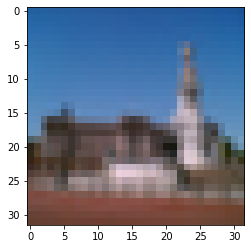

In [ ]:
print(y_train[700])
plt.imshow(x_train[700]);

In [ ]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (50000, 32, 32, 3)
y_train (50000, 1)
x_test (10000, 32, 32, 3)
y_test (10000, 1)


**RESHAPE THE DATASET**

In [ ]:
#Need to reshape the x train and x test
reshape_X = 3072

x_train = x_train.reshape(50000, reshape_X)
x_test = x_test.reshape(10000, reshape_X)

In [ ]:
print("x_train", x_train.shape)
print("x_test", x_test.shape)


x_train (50000, 3072)
x_test (10000, 3072)


In [ ]:
x_train = x_train.astype('float32')
X_test = x_test.astype('float32')
y_train = y_train.flatten()
y_test = y_test.flatten()

**SCALING OF THE DATA**

In [ ]:
def float_scale(x_train,x_test):
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    # normalizer
    x_train /= 255
    x_test /= 255
    return x_train, x_test

x_train, x_test=float_scale(x_train,x_test)

**PCA**

In [ ]:
#PERFORM PCA
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(x_train)

PCA(n_components=0.95)

In [ ]:
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

**BASE MODEL - RANDOMFOREST**

In [ ]:
# RANDOMFOREST MODEL

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 

rf = RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)

In [ ]:
expected_y  = y_test
predicted_y = rf_model.predict(x_test)

In [ ]:
predicted_y

array([49, 42, 89, ..., 66,  8, 45])

In [ ]:
#CHECK BASE MODEL PERFORMANCE

from sklearn.metrics import classification_report, confusion_matrix

print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))


              precision    recall  f1-score   support

           0       0.30      0.52      0.38       100
           1       0.17      0.34      0.23       100
           2       0.07      0.07      0.07       100
           3       0.07      0.10      0.08       100
           4       0.11      0.17      0.13       100
           5       0.10      0.09      0.09       100
           6       0.14      0.12      0.13       100
           7       0.17      0.28      0.21       100
           8       0.17      0.16      0.16       100
           9       0.28      0.30      0.29       100
          10       0.05      0.04      0.05       100
          11       0.13      0.07      0.09       100
          12       0.10      0.12      0.11       100
          13       0.09      0.08      0.09       100
          14       0.09      0.10      0.10       100
          15       0.07      0.06      0.07       100
          16       0.25      0.20      0.22       100
          17       0.16    

In [ ]:
#Validate using the images given
import os

base_dir = '/content/drive/MyDrive/CPSC4830/Midterm 2/Test'
val_names = os.listdir(base_dir)
print(val_names[:4])

['camel.jpg', 'television.jpg', 'truck.jpg', 'wardrobe.jpg']


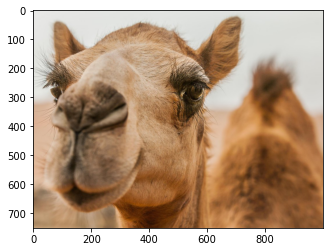

In [ ]:
from keras.preprocessing import image
from PIL import Image
img = image.load_img('/content/drive/MyDrive/CPSC4830/Midterm 2/Test/camel.jpg')
plt.imshow(img)

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
image = load_img('/content/drive/MyDrive/CPSC4830/Midterm 2/Test/camel.jpg', target_size=(32, 32))
img = np.array(image)
img = img / 255.0
img.shape

(32, 32, 3)

In [ ]:
img = img.reshape(1, reshape_X)
img.shape

(1, 3072)

In [ ]:
#Convert to float
img = img.astype('float32')

In [ ]:
img = pca.transform(img)

In [ ]:
val_y = rf_model.predict(img)
val_y

array([94])

In [ ]:
labels[94] #camel was detected as wardrobe

'wardrobe'

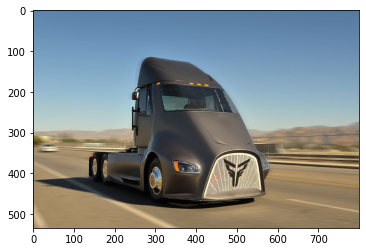

In [ ]:
#ANOTHER IMAGE
from keras.preprocessing import image
from PIL import Image
img2 = image.load_img('/content/drive/MyDrive/CPSC4830/Midterm 2/Test/truck.jpg')
plt.imshow(img2)

In [ ]:
#ANOTHER IMAGE - TRUCK
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
image2 = load_img('/content/drive/MyDrive/CPSC4830/Midterm 2/Test/truck.jpg', target_size=(32, 32))
img2 = np.array(image2)
img2 = img2 / 255.0
img2 = img2.reshape(1, reshape_X)
img2 = img2.astype('float32')
img2 = pca.transform(img2)
val_y = rf_model.predict(img2)
val_y

array([15])

In [ ]:
labels[15] #truck was detected as camel

'camel'

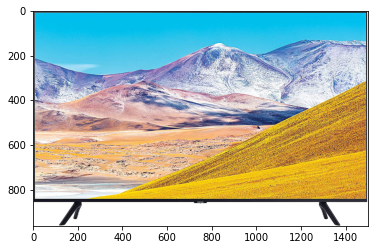

In [ ]:
#ANOTHER IMAGE
from keras.preprocessing import image
from PIL import Image
img = image.load_img('/content/drive/MyDrive/CPSC4830/Midterm 2/Test/television.jpg')
plt.imshow(img)

In [ ]:
#ANOTHER IMAGE - TELEVISION
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
image3 = load_img('/content/drive/MyDrive/CPSC4830/Midterm 2/Test/television.jpg', target_size=(32, 32))
img3 = np.array(image3)
img3 = img3 / 255.0
img3 = img3.reshape(1, reshape_X)
img3 = img3.astype('float32')
img3 = pca.transform(img3)
val_y = rf_model.predict(img3)
val_y

array([53])

In [ ]:
labels[53] #televison was detected as orange

'orange'

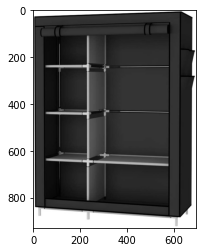

In [ ]:
#ANOTHER IMAGE
from keras.preprocessing import image
from PIL import Image
img = image.load_img('/content/drive/MyDrive/CPSC4830/Midterm 2/Test/wardrobe.jpg')
plt.imshow(img)

In [ ]:
#ANOTHER IMAGE - WARDROBE
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
image4 = load_img('/content/drive/MyDrive/CPSC4830/Midterm 2/Test/wardrobe.jpg', target_size=(32, 32))
img4 = np.array(image4)
img4 = img4 / 255.0
img4 = img4.reshape(1, reshape_X)
img4 = img4.astype('float32')
img4 = pca.transform(img4)
val_y = rf_model.predict(img4)
val_y

array([87])

In [ ]:
labels[87] #wardrobe was detected as television

'television'

**Observation:**

Precision is 21%, Recall is 22%, accuracy is 22%

All the images such as camel, wardrobe, truck and television were wrongly detected. It can be concluded that the Base Model is not good.

**RANDOM FOREST WITH XGBOOST**



In [ ]:
import xgboost as xgb

xgb = xgb.XGBRFClassifier(colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10) 

In [ ]:
#FIT THE MODEL

xgb.fit(x_train, y_train)

#PREDICT

predicted_y2 =xgb.predict(x_test) 

In [ ]:
expected_y  = y_test

In [ ]:
#CHECK BASE MODEL PERFORMANCE
from sklearn.metrics import classification_report, confusion_matrix

print(metrics.classification_report(expected_y, predicted_y2))
print(metrics.confusion_matrix(expected_y, predicted_y2))


              precision    recall  f1-score   support

           0       0.27      0.40      0.32       100
           1       0.19      0.19      0.19       100
           2       0.12      0.07      0.09       100
           3       0.12      0.14      0.13       100
           4       0.05      0.01      0.02       100
           5       0.04      0.03      0.03       100
           6       0.15      0.12      0.13       100
           7       0.17      0.11      0.13       100
           8       0.20      0.08      0.11       100
           9       0.22      0.27      0.24       100
          10       0.12      0.03      0.05       100
          11       0.09      0.03      0.04       100
          12       0.14      0.10      0.12       100
          13       0.12      0.09      0.10       100
          14       0.17      0.07      0.10       100
          15       0.06      0.02      0.03       100
          16       0.20      0.17      0.18       100
          17       0.12    

In [ ]:
#ANOTHER IMAGE - TRUCK
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
image2 = load_img('/content/drive/MyDrive/CPSC4830/Midterm 2/Test/truck.jpg', target_size=(32, 32))

img2 = np.array(image2)
img2 = img2 / 255.0
img2 = img2.reshape(1, reshape_X)
img2 = img2.astype('float32')
img2 = pca.transform(img2)
val_y = xgb.predict(img2)
val_y

array([17])

In [ ]:
labels[17]  #truck was detected as castle

'castle'

In [ ]:
#ANOTHER IMAGE - CAMEL
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
image = load_img('/content/drive/MyDrive/CPSC4830/Midterm 2/Test/camel.jpg', target_size=(32, 32))

img = np.array(image)
img = img / 255.0
img = img.reshape(1, reshape_X)
img = img.astype('float32')
img = pca.transform(img)
val_y = xgb.predict(img)
val_y

array([89])

In [ ]:
labels[89]  #truck was detected as tractor

'tractor'

In [ ]:

image = load_img('/content/drive/MyDrive/CPSC4830/Midterm 2/Test/television.jpg', target_size=(32, 32))

img = np.array(image)
img = img / 255.0
img = img.reshape(1, reshape_X)
img = img.astype('float32')
img = pca.transform(img)
val_y = xgb.predict(img)
val_y

array([82])

In [ ]:
labels[82] #truck was detected as sunflower

'sunflower'

In [ ]:
#WARDROBE 
val_y = xgb.predict(img4)
val_y


array([22])

In [ ]:
labels[22]  #wardrobe was detected as clock

'clock'

**OBSERVATION:**

Precision is 14%, Recall is 15% and Accuracy is 16%

All the images such as camel, wardrobe, truck and television were wrongly detected. It can be concluded that the Base Model is not good.

**RANDOM FOREST WITH ADABOOST**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#RANDOM FOREST WITH ADA BOOST
rfc = RandomForestClassifier(n_estimators=50)

#adaboost classifer object
ada1 = AdaBoostClassifier(n_estimators=5, base_estimator=rfc, learning_rate=1)

In [ ]:
# Train Adaboost Classifer
rfc_ada = ada1.fit(x_train, y_train)

#Predict the response for test dataset
predicted_y_ada = rfc_ada.predict(x_test)

**ACCURACY WITH ADABOOST**

In [ ]:
#CHECK MODEL PERFORMANCE WITH ADA
print(metrics.classification_report(expected_y, predicted_y_ada))
print(metrics.confusion_matrix(expected_y, predicted_y_ada))

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(expected_y, predicted_y_ada))

**CONCLUSION**

BASELINE MODEL has Precision is 21%, Recall is 22%, accuracy is 22%

RF WITH XGBOOST, Precision is 14%, Recall is 15% and Accuracy is 16%

ADABOOST Can't be run due to machine limitation. It keeps on crashing.

Based on the result, it is best to use the baseline model as the precision, accuracy and recall lowered when XGBOOST was used. It is necessary to optimize the precision for as we do not want to misdiagnose a cookie as a face of a dog.

## Problem 2

## Perform Text Classification on the tweet data about COVID19. The tweets have been pulled from Twitter and manual tagging has been done then. The relevant CSV file have been attached in D2L.

## A sample .ipynb work file for this problem have been provided with spam.csv file (File used in Class). This file contains code for TF-IDF along with Gensim LDA package to find latent topics for the tweets (Topic Modelling). 

## Top of the code file contains relevent references for the code, please go through them. Few things are missing in the code that you need to apply to complete it.

### 1. Use the original Tweet File instead of my sample spam.csv file for your work. [2 Marks]
### 2. Properly remove punctuations, stopwords and any words of length 1 or 2. [3 Marks]
### 3. Get the wordcloud (as mentioned in the code) after apply step 1 (This has not been done in the code). [2 Marks]
### 4. Change number of Topics to 20 in the Gensim LDAMulticore and draw the visualisation asshown in samplecode. [3 Marks]
### 5. Write a complete code using TF-IDF along with Random Forest Classifier to build a Tweet Sentiment classification Model.Use your own discretion to determine the relevant hyperparameters and model parameters. Make sure to provide justification while dropping a column. Remember this is a multiclass classification problem. Give the relevant precision and recall for the model.[10 Marks]


## Columns:
## 1) Location
## 2) Tweet At
## 3) Original Tweet
## 4) Sentiment (To be predicted)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')

import gensim
from gensim import corpora, models

from pprint import pprint


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import pandas as pd

stop_words = nltk.corpus.stopwords.words('english')

messages = pd.read_csv('/content/drive/MyDrive/CPSC4830/Midterm 2/Corona_NLP_train.csv', encoding='latin-1')

messages

UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  
0      @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1      advice Talk to your neighbours family to excha...            Positive  
2      Coronavirus Australia: Woolworths to give elde...            Positive  
3      My food stock is not the only one which is emp...            Positive  
4      Me, ready to go at supermarket during the #COV...  Extremely Negative  
...                                                  ...                 ...  
41152  Airline pilots offering to stock supermarket s...             Neutral  
41153  Response to complaint not provided citing COVI...  Extremely Negative  
41154  You know itÂs getting tough when @KameronWild...            Positive  
41155  Is it wrong that the smell of hand sanitizer i...             Neutral  
41156  @TartiiCat Well new/used Rift S are going for ...            Negative  

[41157 rows x 6 columns]

In [ ]:
messages.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [ ]:
#APPLY LENGTH 
messages['length'] = messages['OriginalTweet'].apply(len)
messages.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

   length  
0     111  
1     237  
2     131  
3     306  
4     310

In [ ]:
messages.length.describe()

count    41157.000000
mean       204.200160
std         68.655129
min         11.000000
25%        151.000000
50%        215.000000
75%        259.000000
max        355.000000
Name: length, dtype: float64

In [ ]:
#no length of words with1 or 2
messages.shape

(41157, 7)

In [ ]:
messages.shape

(41157, 7)

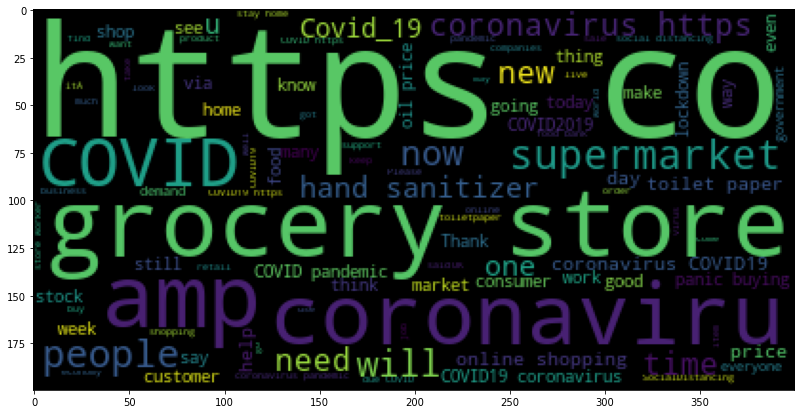

In [ ]:
#word cloud visualization for the text
from wordcloud import WordCloud 
wc = WordCloud(
    background_color='black',
    max_words = 100,
    random_state = 42,
    max_font_size=110
    )

wc.generate(' '.join(messages['OriginalTweet']))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

In [ ]:
#Remove common words
documents = messages['OriginalTweet'].tolist()

texts = [
    [word for word in document.lower().split() if word not in stop_words]
    for document in documents
]


dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 2),
  (20, 1),
  (21, 1),
  (22, 2),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(27, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1)],
 [(42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1)],
 [(42, 1),
  (45, 1),
  (46, 1),
  (53, 1),
  (58, 1),
  (61, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1)],
 [(33, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (

In [ ]:
tfidf = models.TfidfModel(corpus)

corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

Streaming output truncated to the last 5000 lines.
[(79, 0.05419891971788783), (139, 0.11582743843486615), (373, 0.08562598793456788), (572, 0.08348244353984877), (2204, 0.21541589609665046), (4763, 0.21729311918658814), (7793, 0.18006377977498333), (8954, 0.21930951875769084), (13736, 0.19843331723852073), (14949, 0.2004497168096234), (21824, 0.24530797495536513), (23981, 0.24034719815581218), (25310, 0.25137947506645947), (27035, 0.24530797495536513), (29737, 0.22385488378221255), (43283, 0.1299451359420032), (97185, 0.27023927701452694), (108774, 0.2890990789625944), (108775, 0.2890990789625944), (108776, 0.2890990789625944), (108777, 0.2890990789625944)]
[(20, 0.09389383797723486), (33, 0.14093012734367977), (144, 0.12950123176563952), (293, 0.13696606971836417), (407, 0.17627751826631205), (642, 0.14019003084747766), (669, 0.1345780463069387), (1085, 0.167536737713886), (1272, 0.1461432456771558), (1630, 0.1561489022618923), (2253, 0.21304089019858372), (3778, 0.20051990237481782)

In [ ]:
#NUM TOPICS = 20 as required
lda_model = gensim.models.LdaMulticore(corpus_tfidf, 
                                       num_topics=20, 
                                       id2word = dictionary, 
                                       passes = 2, 
                                       workers=2)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.002*"#covid19" + 0.002*"@tesco" + 0.002*"@tim_dodson" + 0.001*"food" + 0.001*"closures," + 0.001*"news" + 0.001*"@brianschatz" + 0.001*"#covid19france" + 0.001*"reports" + 0.001*"several"


Topic: 1 
Words: 0.002*"it'becoming" + 0.002*"#covid19" + 0.002*"minivan" + 0.001*"#covid19france" + 0.001*"solution," + 0.001*"#medtwitter" + 0.001*"mayor" + 0.001*"uptick" + 0.001*"@7sealsoftheend" + 0.001*"covid-outbreak"


Topic: 2 
Words: 0.005*"fluctuations" + 0.004*"several" + 0.003*"brands:" + 0.003*"covid-outbreak" + 0.002*"impacting" + 0.002*"food" + 0.002*"fight" + 0.002*"services" + 0.002*"global" + 0.002*"covid-situation,"


Topic: 3 
Words: 0.003*"https://.co/v17h0dvm1o" + 0.002*"covid-outbreak" + 0.002*"brands:" + 0.002*"several" + 0.001*"uptick" + 0.001*"#covid19" + 0.001*"#covid19france" + 0.001*"allowed" + 0.001*"surge" + 0.001*"@kingswoodshop"


Topic: 4 
Words: 0.002*"several" + 0.002*"#covid19" + 0.001*"wholesale" + 0.001*"covid-outbreak" + 0.001*"#covid19fran

In [ ]:
top_topics = lda_model.top_topics(corpus_tfidf)
num_topics = 20
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -8.1987.
[([(0.005354791, 'services'),
   (0.0047138175, 'fight'),
   (0.0040435973, 'insights'),
   (0.0039196587, '#toiletpapercrisis'),
   (0.0037407319, 'several'),
   (0.0035547724, 'food'),
   (0.0034276848, 'reports'),
   (0.0033348089, '@tim_dodson'),
   (0.003259943, 'workers'),
   (0.0029610235, 'accumulation'),
   (0.0028054751, 'online'),
   (0.0027579514, 'shopping'),
   (0.0026777885, '@tesco'),
   (0.0024497581, 'news'),
   (0.002419526, 'empty.'),
   (0.0023795955, 'covid-situation,'),
   (0.0023632545, 'pretty'),
   (0.0023336362, 'covid-outbreak'),
   (0.0022396531, 'healthy.'),
   (0.0021687725, '#covid19')],
  -2.9190730770288598),
 ([(0.0023919262, '@tim_dodson'),
   (0.002271477, '#covid19'),
   (0.0022386075, 'reports'),
   (0.0022340808, 'insights'),
   (0.0020727108, 'food'),
   (0.0020374628, '#toiletpapercrisis'),
   (0.0019343066, 'several'),
   (0.001840114, 'covid-outbreak'),
   (0.0017719545, '@7sealsoftheend'),
   (0.0016721148, 

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_tfidf))  
# a measure of how good the model is. lower the better.


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -13.896958696612986


/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.246731 -0.005955       1        1  22.932079
11     0.100055  0.073058       2        1   7.599816
2      0.041072 -0.135022       3        1   5.223327
6      0.035642  0.040865       4        1   5.037678
5      0.036940 -0.019656       5        1   4.981903
12     0.030804  0.008415       6        1   4.862647
0      0.012652  0.029903       7        1   4.405624
3     -0.014751 -0.069060       8        1   4.181826
19    -0.014707 -0.022185       9        1   4.035728
4     -0.004044  0.015355      10        1   3.936254
15    -0.010826  0.021884      11        1   3.883296
7     -0.025648  0.000614      12        1   3.644779
13    -0.034096  0.027765      13        1   3.464111
1     -0.041319  0.021477      14        1   3.350065
8     -0.042902  0.009860      15        1   3.320451
9     -0.045690 -0.010947      16        1   3.307940
14    -0.049768  0.006103      17        1   3.167814
18    -0.060446  0.008635      18        1   3.142337
16    -0.059702 -0.005499      19        1   3.021605
10    -0.099996  0.004390      20        1   2.500720, topic_info=                         Term        Freq       Total Category  logprob  \
2221             fluctuations  148.000000  148.000000  Default  30.0000   
9076   https://.co/v17h0dvm1o   33.000000   33.000000  Default  29.0000   
116                     prove   28.000000   28.000000  Default  28.0000   
236                   brands:  242.000000  242.000000  Default  27.0000   
37994                  books.   22.000000   22.000000  Default  26.0000   
...                       ...         ...         ...      ...      ...   
1798              #medtwitter    3.897532   95.570771  Topic20  -6.9478   
45                   #covid19    4.279828  280.409823  Topic20  -6.8542   
46             #covid19france    3.550541  216.362575  Topic20  -7.0410   
33             covid-outbreak    3.619329  280.523768  Topic20  -7.0219   
6007   https://.co/ca34zbqa2m    2.822159   14.789968  Topic20  -7.2706   

       loglift  
2221   30.0000  
9076   29.0000  
116    28.0000  
236    27.0000  
37994  26.0000  
...        ...  
1798    0.4891  
45     -0.4937  
46     -0.4213  
33     -0.6618  
6007    2.0321  

[1379 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
21939     13  0.941687    "estonian
13678     12  0.900143        "even
23599     13  0.899138         "for
271       19  0.715602   "observed"
20682      9  0.818647  "on-demand"
...      ...       ...          ...
14232      7  0.730366       avoid
69810      2  0.947324       known
12284      5  0.862144       state
3186       1  0.887023       £.tube
3186       6  0.036959       £.tube

[3273 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 12, 3, 7, 6, 13, 1, 4, 20, 5, 16, 8, 14, 2, 9, 10, 15, 19, 17, 11])

**RANDOM FOREST**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
messages2 = messages.drop(labels = ["ScreenName", "Location", "TweetAt"], axis = 1) #dropusername as it serves like an index

In [ ]:
def message_cleaning(message):
    Test_punc_removed = [w for w in message if w not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() 
                                    if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
message_clean = messages['OriginalTweet'].apply(message_cleaning)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweet_countvectorizer = vectorizer.fit_transform(messages['OriginalTweet'])

In [ ]:
X = tweet_countvectorizer

label = messages['Sentiment']
y = label

In [ ]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 

rf = RandomForestClassifier()
rf_model = rf.fit(x_train1, y_train1)

In [ ]:
expected_y1  = y_test1
predicted_y1 = rf_model.predict(x_test1)
from sklearn.metrics import classification_report, confusion_matrix

print(metrics.classification_report(expected_y1, predicted_y1))
print(metrics.confusion_matrix(expected_y1, predicted_y1))


                    precision    recall  f1-score   support

Extremely Negative       0.67      0.31      0.42      1084
Extremely Positive       0.70      0.30      0.42      1321
          Negative       0.50      0.51      0.50      2000
           Neutral       0.53      0.80      0.64      1509
          Positive       0.48      0.59      0.53      2318

          accuracy                           0.53      8232
         macro avg       0.58      0.50      0.50      8232
      weighted avg       0.55      0.53      0.51      8232

[[ 333    9  507  118  117]
 [   8  400   56   91  766]
 [ 116   21 1012  414  437]
 [  11    9  113 1206  170]
 [  30  129  340  443 1376]]


Accuracy is 53%

Weighted Precision is 55%

Weighted Recall is 53%

